## IMPORTING PACKAGES

In [1]:
#Imports
#Packages for numerics + dataframes
import numpy as np
import pandas as pd

#Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Packages for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## EXPLORATORY DATA ANALYSIS

In [2]:
#Loading dataframe
df = pd.read_csv("9.1 loan train.csv")
test_df = pd.read_csv("9.2 loan test.csv")

#EDA
print('''DATA EXPLORATION
Shape Of Dataframe: {}
Shape of Dataframe Post-Depulication: {}
Size of Dataframe: ({})
Total Count Of Missing Values: ({})'''.
format(df.shape,
       df.drop_duplicates().shape,
       df.size,df.isnull().sum().sum()))

print('\nDATA SUMMARY')
df.info()
print('\nDATA PREVIEW')
df.head()

DATA EXPLORATION
Shape Of Dataframe: (58645, 13)
Shape of Dataframe Post-Depulication: (58645, 13)
Size of Dataframe: (762385)
Total Count Of Missing Values: (0)

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file 

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## DATA VISUALIZATION

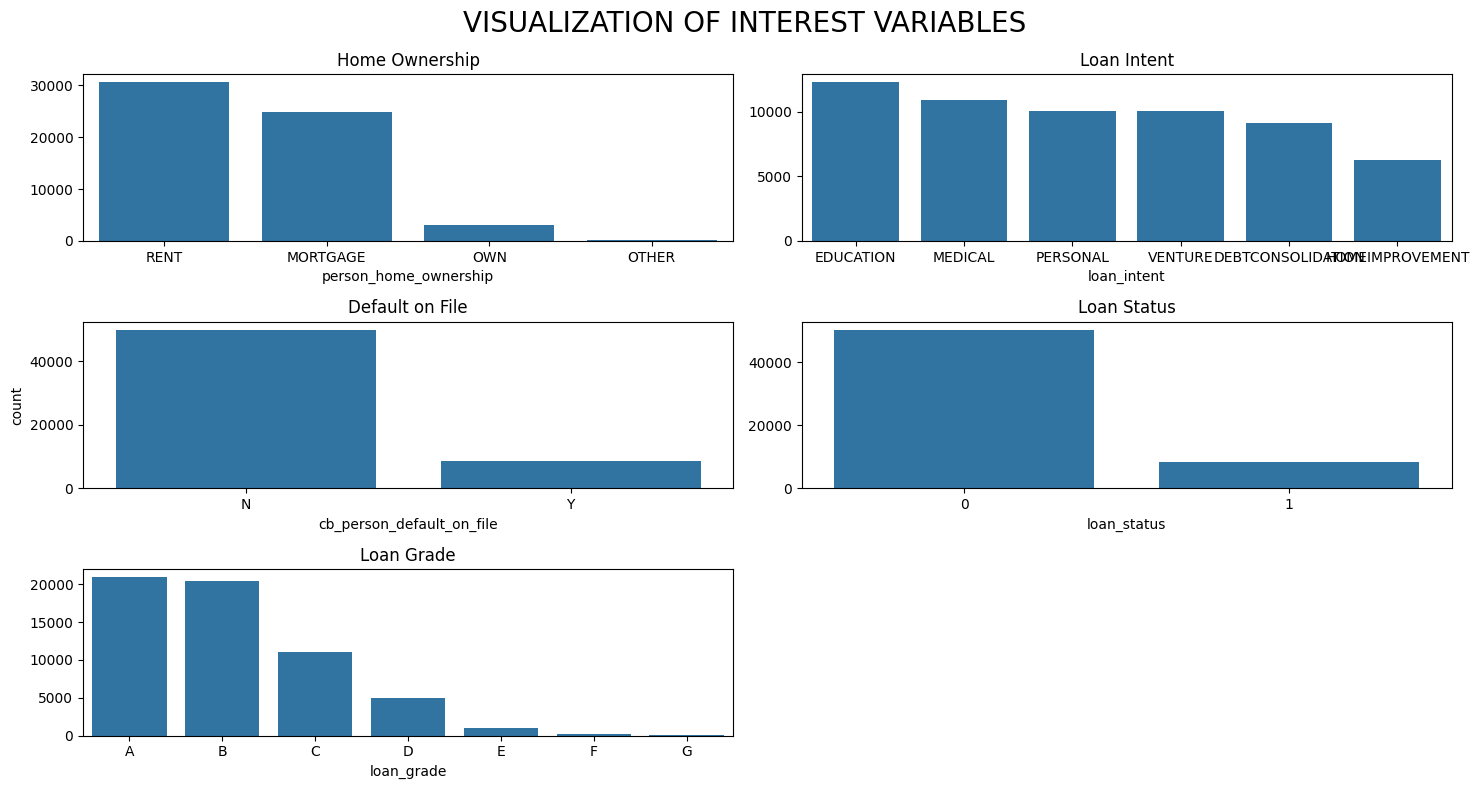

In [3]:
# Setting up subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 8))
plt.suptitle("VISUALIZATION OF INTEREST VARIABLES", fontsize=20)

# Create visualizations
sns.barplot(x=df['person_home_ownership'].value_counts().index, y=df['person_home_ownership'].value_counts().values, ax=ax[0,0])
sns.barplot(x=df['loan_intent'].value_counts().index, y=df['loan_intent'].value_counts().values, ax=ax[0,1])
sns.barplot(df['cb_person_default_on_file'].value_counts(), ax=ax[1,0])
sns.barplot(x=df['loan_status'].value_counts().index, y=df['loan_status'].value_counts().values, ax=ax[1,1])
sns.barplot(x=df['loan_grade'].value_counts().index, y=df['loan_grade'].value_counts().values, ax=ax[2,0])

#Disabling unused axis
ax[2,1].axis('off')

# Set titles for each visualization
ax[0,0].set_title('Home Ownership')
ax[0,1].set_title('Loan Intent')
ax[1,0].set_title('Default on File')
ax[1,1].set_title('Loan Status')
ax[2,0].set_title('Loan Grade')

plt.tight_layout()
plt.show()

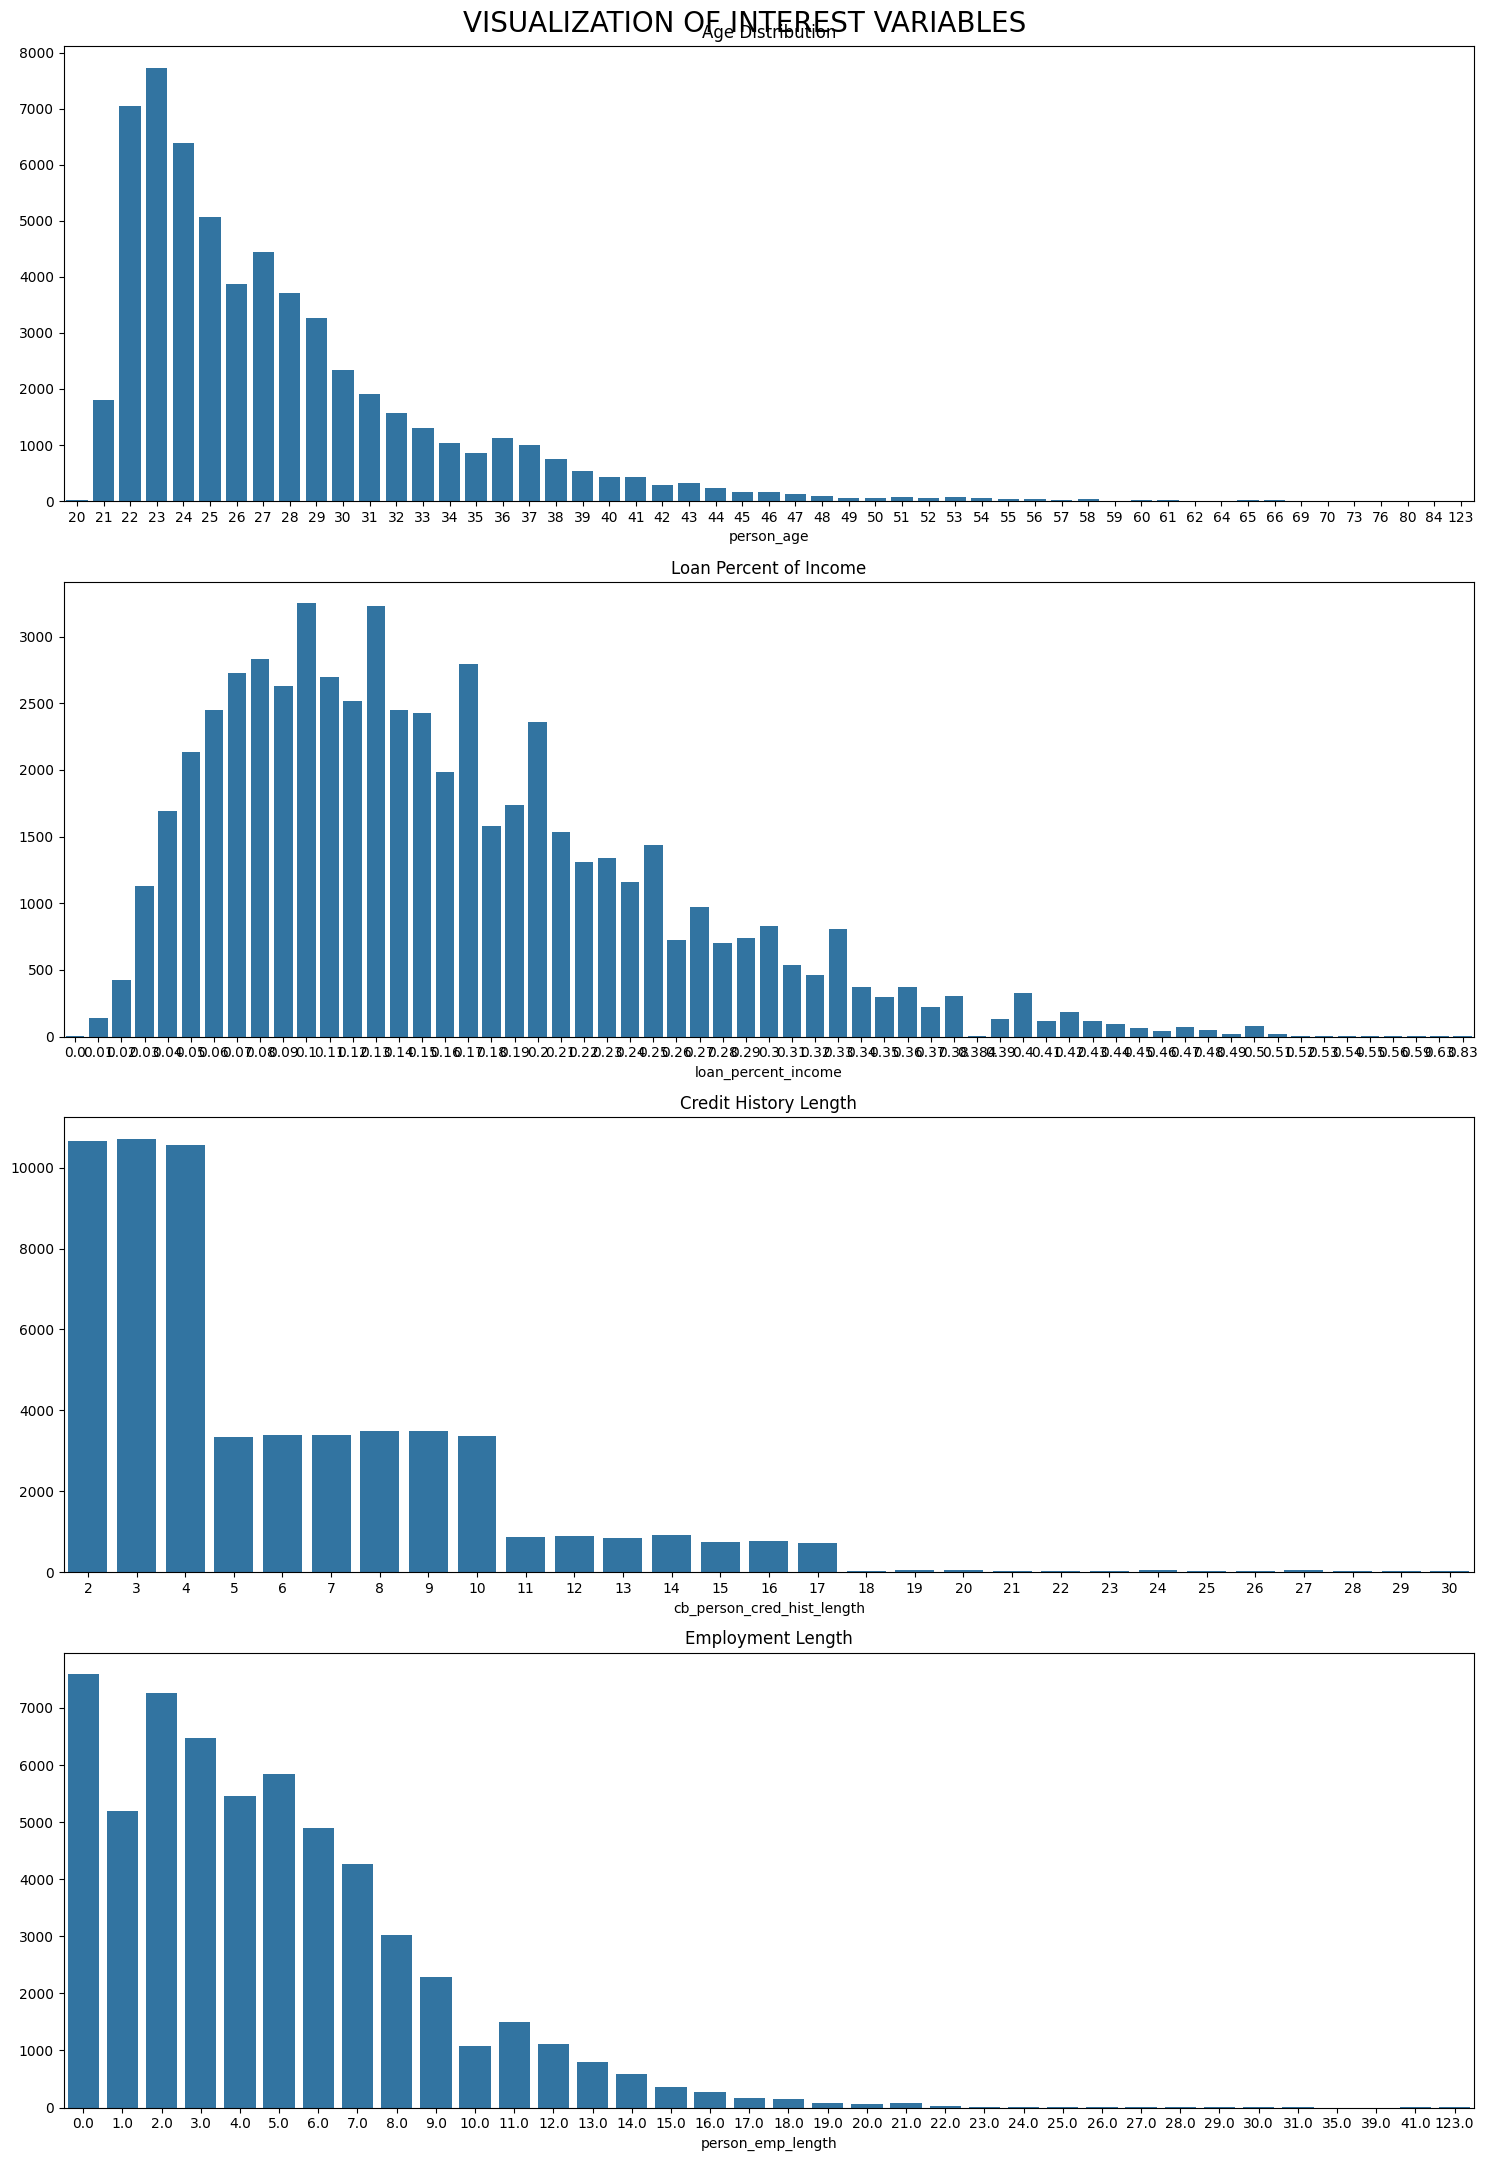

In [4]:
# Setting up subplots
fig, ax = plt.subplots(4, 1, figsize=(15, 22))
plt.suptitle("VISUALIZATION OF INTEREST VARIABLES", fontsize=20)

# Create visualizations
sns.barplot(x=df['person_age'].value_counts().index, y=df['person_age'].value_counts().values, ax=ax[0])
sns.barplot(x=df['loan_percent_income'].value_counts().index, y=df['loan_percent_income'].value_counts().values, ax=ax[1])
sns.barplot(x=df['cb_person_cred_hist_length'].value_counts().index, y=df['cb_person_cred_hist_length'].value_counts().values, ax=ax[2])
sns.barplot(x=df['person_emp_length'].value_counts().index, y=df['person_emp_length'].value_counts().values, ax=ax[3])

# Set titles for each visualization
ax[0].set_title('Age Distribution')
ax[1].set_title('Loan Percent of Income')
ax[2].set_title('Credit History Length')
ax[3].set_title('Employment Length')
plt.tight_layout()
plt.show()

## FEATURE ENGINEERING

In [5]:
#Removing columns
df = df.drop(columns=['id'], axis=1)
test_df = test_df.drop(columns=['id'], axis=1)

#Converting catergorical values to binary values
df = pd.get_dummies(data=df, columns=['person_home_ownership', 'loan_intent', 'loan_grade',  'cb_person_default_on_file'])
test_df = pd.get_dummies(data=test_df, columns=['person_home_ownership', 'loan_intent', 'loan_grade',  'cb_person_default_on_file'])
test_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,23,69000,3.0,25000,15.76,0.36,2,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,26,96000,6.0,10000,12.68,0.10,4,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,26,30000,5.0,4000,17.19,0.13,2,False,False,False,...,True,False,False,False,False,True,False,False,False,True
3,33,50000,4.0,7000,8.90,0.14,7,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,26,102000,8.0,15000,16.32,0.15,4,True,False,False,...,False,False,False,False,True,False,False,False,False,True


## MODEL PREP

In [6]:
#Defining X and y variables
y = df.loan_status
X = df.drop(columns=['loan_status'], axis=1)

#Generating train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

#Generating dataframe for split
split = pd.DataFrame(data={"Dimensions":[X_train.shape, X_test.shape, y_train.size, y_test.size]},
                    index=["X Train", "X Test", "Y Train" ,"Y Test"])

#Previewing split
split

,Dimensions
X Train,"(43983, 26)"
X Test,"(14662, 26)"
Y Train,43983
Y Test,14662


In [7]:
# Initialize empty lists to store results
Model = []
Accuracy = []
Precision = []
F1 = []
Recall = []
ROC_AUC = []

# Generating function to store and display results
def resultify(name_or_results, test=None, pred=None):
    """
    Processes results if test and pred are provided, 
    or displays results if passed with no additional arguments.
    """
    
    # If called with no test/pred arguments, display the results DataFrame
    if test is None and pred is None:
        return pd.DataFrame(
            data={'Accuracy': Accuracy,
                  'Precision': Precision,
                  'Recall': Recall,
                  'F1': F1,
                  'ROC AUC': ROC_AUC},
            index=Model
        )
    
    # Ensure all required arguments are provided for result processing
    if not (test is None or pred is None):
        # Generate evaluation scores
        accuracy_value = round(accuracy_score(test, pred) * 100, 0)
        precision_value = round(precision_score(test, pred) * 100, 0)
        recall_value = round(recall_score(test, pred) * 100, 0)
        f1_value = round(f1_score(test, pred) * 100, 0)
        roc_auc_value = round(roc_auc_score(test, pred) * 100, 0)
        
        # Append values to lists
        Model.append(name_or_results)
        Accuracy.append(f"{accuracy_value}%")
        Precision.append(f"{precision_value}%")
        Recall.append(f"{recall_value}%")
        F1.append(f"{f1_value}%")
        ROC_AUC.append(f"{roc_auc_value}%")

## INITIALIZING MODELS

In [8]:
#Initializing first base classifier
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

#Initializing second base classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

#Initializing third base classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42).fit(X_train, y_train)

print("CLASSIFIERS READY")

CLASSIFIERS READY


## PREDICTIONS

In [9]:
#Generating predictions
rfc_pred = rfc.predict(X_test)
resultify("RANDOM FOREST", y_test, rfc_pred) #Applying resultify

#Generating predictions
gbc_pred = gbc.predict(X_test)
resultify("GRADIENT BOOSTING", y_test, gbc_pred) #Applying resultify

#Generating predictions
xgb_pred = xgb.predict(X_test)
resultify("X GRADIENT BOOSTING", y_test, xgb_pred) #Applying resultify

In [10]:
#Displaying results
resultify('results')

,Accuracy,Precision,Recall,F1,ROC AUC
RANDOM FOREST,95.0%,93.0%,71.0%,80.0%,85.0%
GRADIENT BOOSTING,95.0%,92.0%,71.0%,80.0%,85.0%
X GRADIENT BOOSTING,95.0%,90.0%,74.0%,81.0%,86.0%


## CONFUSION MATRICES

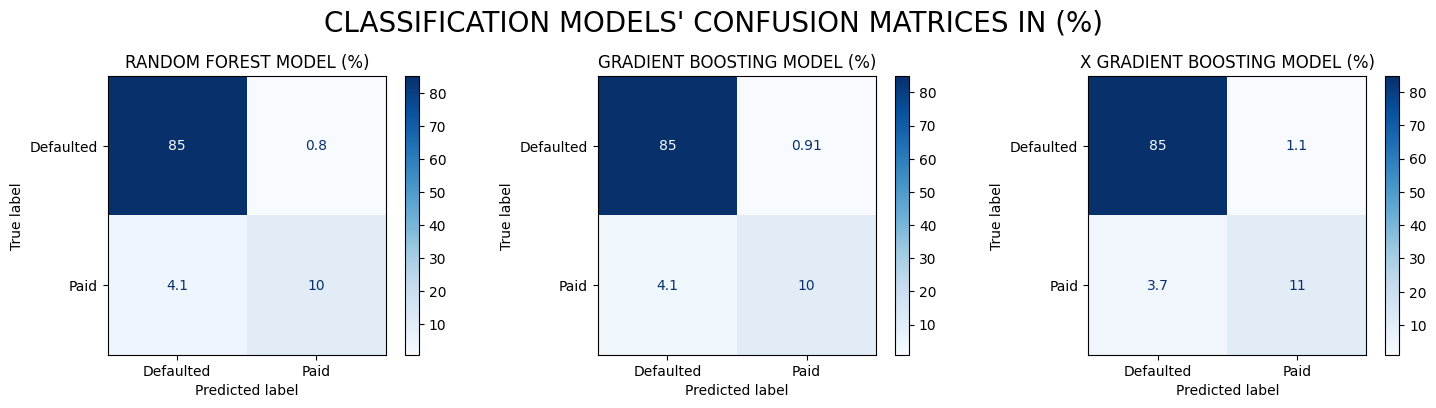

In [11]:
#Defining confusion matricies 
rfc_cm = confusion_matrix(y_test, rfc_pred, normalize="all")*100
gbc_cm = confusion_matrix(y_test, gbc_pred, normalize="all")*100
xgb_cm = confusion_matrix(y_test, xgb_pred, normalize="all")*100

#Generating subplots
fig, ax = plt.subplots(1,3, figsize=(15,4))
plt.suptitle("CLASSIFICATION MODELS' CONFUSION MATRICES IN (%)", fontsize=20)

#Generating visualizations
ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=['Defaulted', 'Paid']).plot(cmap='Blues', ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=['Defaulted', 'Paid']).plot(cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['Defaulted', 'Paid']).plot(cmap='Blues', ax=ax[2])

#Labelling subplots
ax[0].set_title("RANDOM FOREST MODEL (%)")
ax[1].set_title("GRADIENT BOOSTING MODEL (%)")
ax[2].set_title("X GRADIENT BOOSTING MODEL (%)")
plt.tight_layout(pad=1.5)

## ROC-AUC AND CALIBRATION CURVES

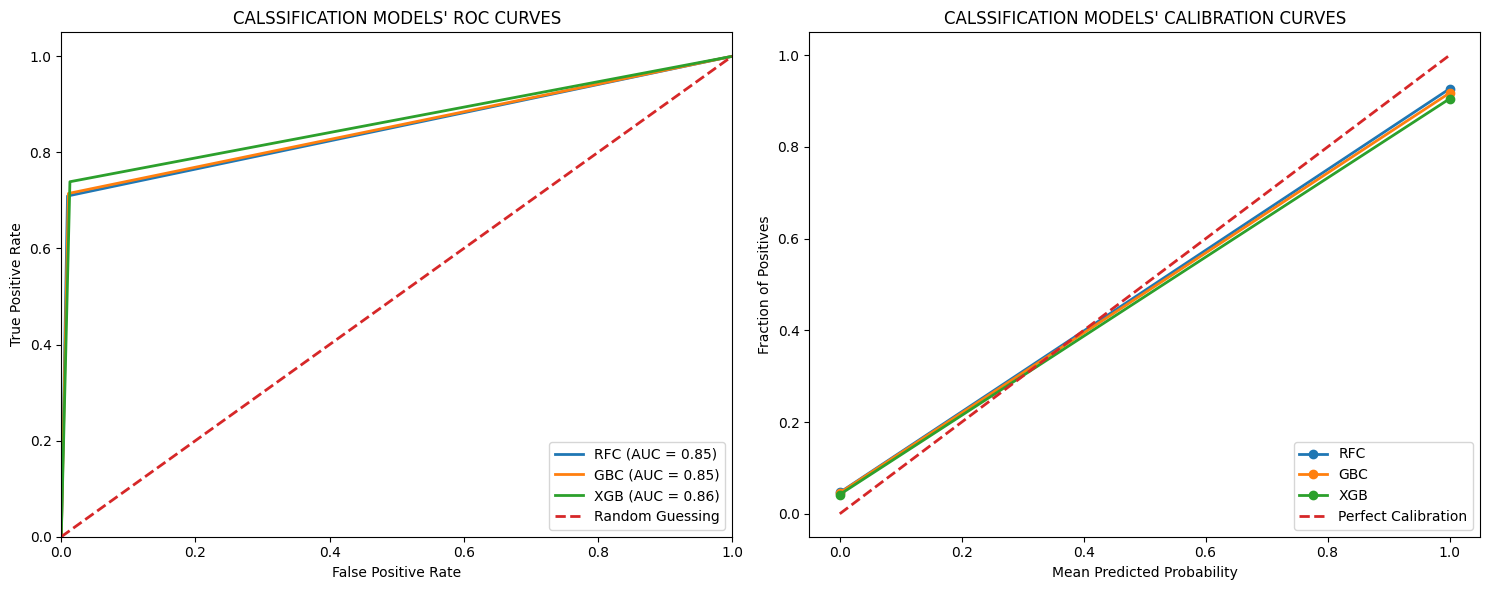

In [12]:
# ROC-AUC for Model 1
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred)
rfc_roc_auc = auc(rfc_fpr, rfc_tpr)

# ROC-AUC for Model 2
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_pred)
gbc_roc_auc = auc(gbc_fpr, gbc_tpr)

# ROC-AUC for Model 3
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Calibration Curve for Model 1
rfc_prob_true, rfc_prob_pred = calibration_curve(y_test, rfc_pred, n_bins=10)

# Calibration Curve for Model 2
gbc_prob_true, gbc_prob_pred = calibration_curve(y_test, gbc_pred, n_bins=10)

# Calibration Curve for Model 3
xgb_prob_true, xgb_prob_pred = calibration_curve(y_test, xgb_pred, n_bins=10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ROC-AUC Plot for all models
axes[0].plot(rfc_fpr, rfc_tpr, lw=2, label='RFC (AUC = %0.2f)' % rfc_roc_auc)
axes[0].plot(gbc_fpr, gbc_tpr, lw=2, label='GBC (AUC = %0.2f)' % gbc_roc_auc)
axes[0].plot(xgb_fpr, xgb_tpr, lw=2, label='XGB (AUC = %0.2f)' % xgb_roc_auc)
axes[0].plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random Guessing')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title("CALSSIFICATION MODELS' ROC CURVES")
axes[0].legend(loc="lower right")

# Calibration Curve Plot for all models
axes[1].plot(rfc_prob_pred, rfc_prob_true, marker='o', linewidth=2, label='RFC')
axes[1].plot(gbc_prob_pred, gbc_prob_true, marker='o', linewidth=2, label='GBC')
axes[1].plot(xgb_prob_pred, xgb_prob_true, marker='o', linewidth=2, label='XGB')
axes[1].plot([0, 1], [0, 1],lw=2, linestyle='--', label='Perfect Calibration')
axes[1].set_xlabel('Mean Predicted Probability')
axes[1].set_ylabel('Fraction of Positives')
axes[1].set_title("CALSSIFICATION MODELS' CALIBRATION CURVES")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## FEATURE IMPORTANCE

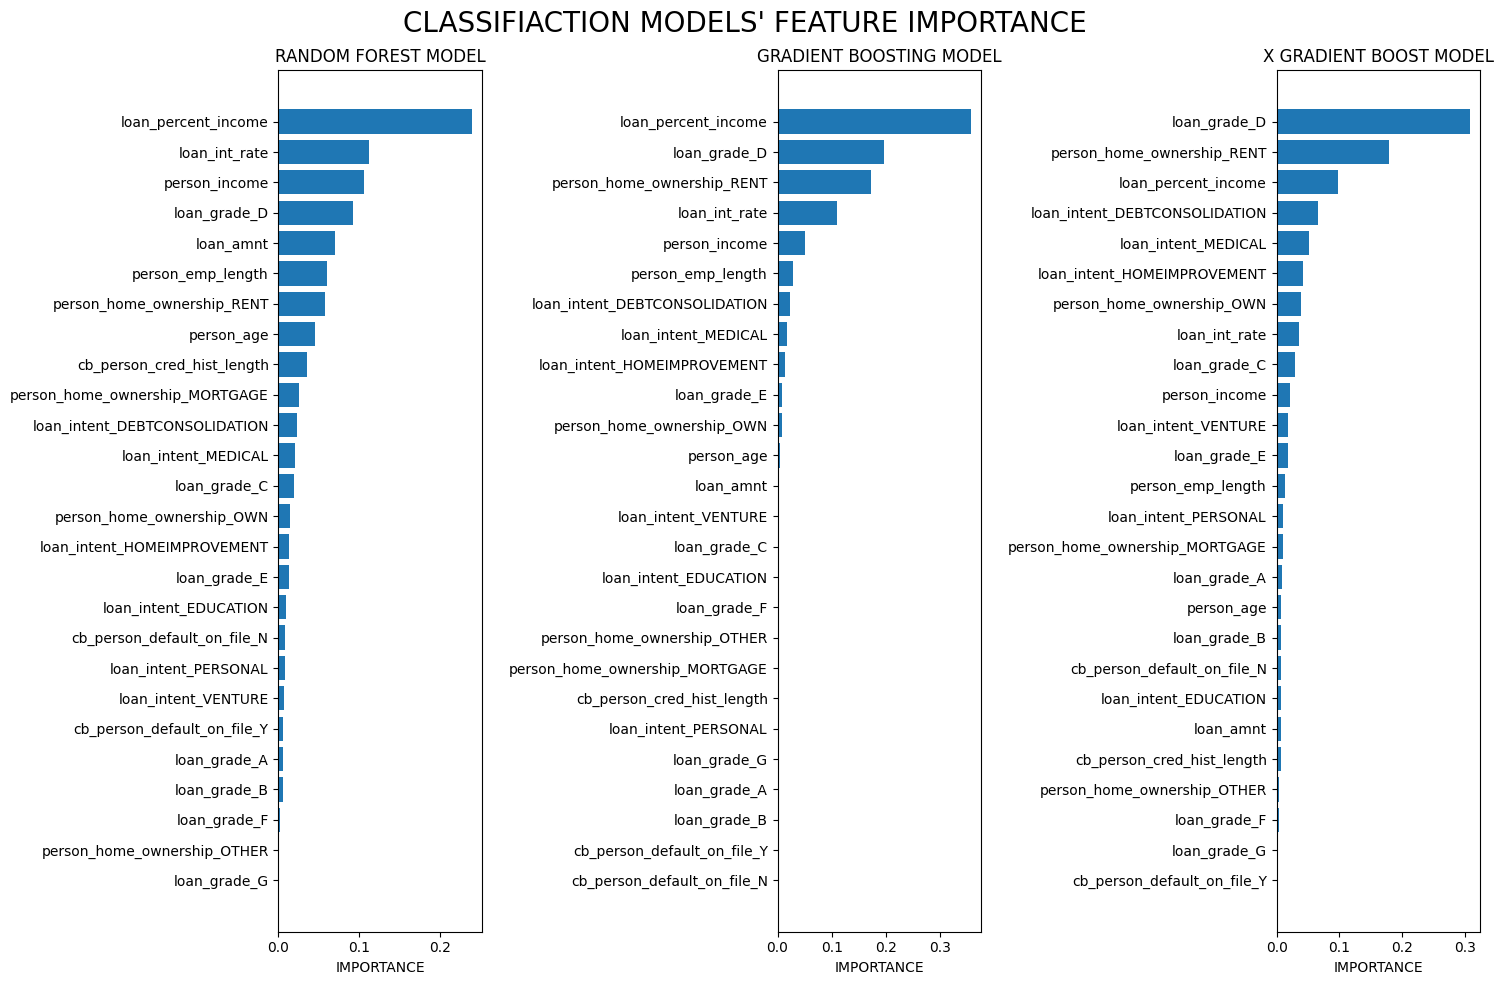

In [13]:
# Get feature importances
rfc_importances = rfc.feature_importances_
gbc_importances = gbc.feature_importances_
xgb_importances = xgb.feature_importances_

# Get feature names
feature_names = X.columns

# Sort features by importance in ascending order
rfc_sorted_idx = np.argsort(rfc_importances)
gbc_sorted_idx = np.argsort(gbc_importances)
xgb_sorted_idx = np.argsort(xgb_importances)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
plt.suptitle("CLASSIFIACTION MODELS' FEATURE IMPORTANCE", fontsize=20)

# Plot feature importances for RandomForestClassifier
ax[0].barh(feature_names[rfc_sorted_idx], rfc_importances[rfc_sorted_idx])
ax[0].set_title("RANDOM FOREST MODEL")
ax[0].set_xlabel("IMPORTANCE")

# Plot feature importances for GradientBoostingClassifier
ax[1].barh(feature_names[gbc_sorted_idx], gbc_importances[gbc_sorted_idx])
ax[1].set_title("GRADIENT BOOSTING MODEL")
ax[1].set_xlabel("IMPORTANCE")

# Plot feature importances for XGBClassifier
ax[2].barh(feature_names[xgb_sorted_idx], xgb_importances[xgb_sorted_idx])
ax[2].set_title("X GRADIENT BOOST MODEL")
ax[2].set_xlabel("IMPORTANCE")

plt.tight_layout()
plt.show()

## SUBMISSION

In [14]:
#Generating dataframe for testing data
submission_df = pd.DataFrame(data={'id': np.arange(58645, 97743),
                                   'loan_status': xgb.predict(test_df)})

#Generating submission csv
#submission_df.to_csv('9.3 Submission.csv', index=False)

#Previewing predictions
submission_df.head(5)

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
